<a href="https://colab.research.google.com/github/abhay43/ML_Code/blob/master/DL-CNN%20with%20different%20cases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://www.dropbox.com/s/t4pzwpvrzneb190/training_set.zip
!wget https://www.dropbox.com/s/i37jfni3d29raoc/test_set.zip

--2020-06-28 10:53:16--  https://www.dropbox.com/s/t4pzwpvrzneb190/training_set.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.66.1, 2620:100:6022:1::a27d:4201
Connecting to www.dropbox.com (www.dropbox.com)|162.125.66.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/t4pzwpvrzneb190/training_set.zip [following]
--2020-06-28 10:53:16--  https://www.dropbox.com/s/raw/t4pzwpvrzneb190/training_set.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc315fcf4d2190d62cf9131bfa73.dl.dropboxusercontent.com/cd/0/inline/A6jP02Hun3C9e6E2DI_J7W_aKejeIHdi30-ScDSjmxr9vFru1anJpdyvZQEZTE-CUFmqn1iNr7pdYFC0OVK6wDhaWOvxNf8fy30aLERJ6YFEj-qx1zhCUI3eISCfB__q1sU/file# [following]
--2020-06-28 10:53:17--  https://uc315fcf4d2190d62cf9131bfa73.dl.dropboxusercontent.com/cd/0/inline/A6jP02Hun3C9e6E2DI_J7W_aKejeIHdi30-ScDSjmxr9vFru1anJpdyvZQEZTE-CUFmqn1iNr7pdYFC0OVK6wDhaWOvxNf8fy30

In [2]:
!unzip training_set.zip
!unzip test_set.zip

Streaming output truncated to the last 5000 lines.
  inflating: training_set/training_set/cats/cat.3705.jpg  
  inflating: training_set/training_set/cats/cat.3706.jpg  
  inflating: training_set/training_set/cats/cat.3707.jpg  
  inflating: training_set/training_set/cats/cat.3708.jpg  
  inflating: training_set/training_set/cats/cat.3709.jpg  
  inflating: training_set/training_set/cats/cat.371.jpg  
  inflating: training_set/training_set/cats/cat.3710.jpg  
  inflating: training_set/training_set/cats/cat.3711.jpg  
  inflating: training_set/training_set/cats/cat.3712.jpg  
  inflating: training_set/training_set/cats/cat.3713.jpg  
  inflating: training_set/training_set/cats/cat.3714.jpg  
  inflating: training_set/training_set/cats/cat.3715.jpg  
  inflating: training_set/training_set/cats/cat.3716.jpg  
  inflating: training_set/training_set/cats/cat.3717.jpg  
  inflating: training_set/training_set/cats/cat.3718.jpg  
  inflating: training_set/training_set/cats/cat.3719.jpg  
  infl

In [34]:
import matplotlib.pyplot as plt
import matplotlib.image as img

import tensorflow
from tensorflow.keras.layers import Conv2D, Activation, ReLU, MaxPooling2D, Dense, Flatten, BatchNormalization,Dropout
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
epochs = 20
batch_size = 20
img_width, img_height = 150,150  #width and height of the images
nb_train_sample =100
nb_validation_samples =100
train_data_dir = r"/content/training_set/training_set"
validation_data_dir=r"/content/test_set/test_set"


In [6]:
import tensorflow.keras.backend as k
if k.image_data_format()=='channels_first': 
    input_shape=(3, img_width, img_height)
else:
    input_shape=(img_width,img_height,3)


In [7]:
train_datagen=ImageDataGenerator ( rescale=1. /255,shear_range =0.2,zoom_range=0.2,horizontal_flip =True)
test_datagen=ImageDataGenerator (rescale=1. /255)
train_generator =train_datagen.flow_from_directory(train_data_dir,target_size =(img_width,img_height), batch_size=batch_size,class_mode='binary',classes=['cats','dogs'])
validation_generator =test_datagen.flow_from_directory(validation_data_dir,target_size =(img_width,img_height), batch_size=batch_size,class_mode='binary')



Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [14]:
model = Sequential()
model.add(Conv2D(64,(3,3), input_shape= input_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 350464)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                22429760  
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 22,431,617
Trainable params: 22,431,617
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 350464)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                22429760  
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 22,431,617
Trainable params: 22,431,617
Non-trainable params: 0
_________________________________________________________________


In [12]:
training = model.fit_generator(train_generator,
                   steps_per_epoch=nb_train_sample,epochs=epochs,
                   validation_data=validation_generator,
                       validation_steps=nb_validation_samples)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
100/100 [==============================] - 19s 189ms/step - loss: 1.3332 - accuracy: 0.5605 - val_loss: 0.6419 - val_accuracy: 0.6485
Epoch 2/20
100/100 [==============================] - 19s 187ms/step - loss: 0.6666 - accuracy: 0.6076 - val_loss: 0.6177 - val_accuracy: 0.6710
Epoch 3/20
100/100 [==============================] - 19s 188ms/step - loss: 0.6563 - accuracy: 0.6515 - val_loss: 0.9131 - val_accuracy: 0.5325
Epoch 4/20
100/100 [==============================] - 19s 188ms/step - loss: 0.6218 - accuracy: 0.6645 - val_loss: 0.6482 - val_accuracy: 0.6315
Epoch 5/20
100/100 [==============================] - 19s 187ms/step - loss: 0.6606 - accuracy: 0.6670 - val_loss: 0.6092 - val_accuracy: 0.6875
Epoch 6/20
100/100 [==============================] - 19s 189ms/step - loss: 0.6071 - accuracy: 0.6900 - val_loss: 0.6209 - val_accuracy: 0.6880
Epoch 7/20
100/100 [==============================] - 

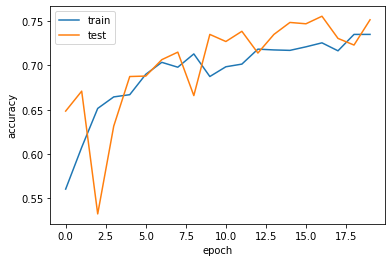

In [22]:
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

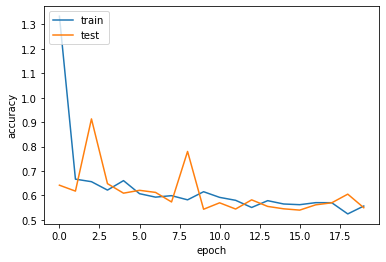

In [23]:
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

In [24]:
model_1 = Sequential()
model_1.add(Conv2D(64,(3,3), input_shape= input_shape, activation='relu'))
model_1.add(MaxPooling2D(pool_size=(2,2)))
model_1.add(Flatten())
model_1.add(Dense(64, activation='sigmoid'))
model_1.add(Dense(1, activation='sigmoid'))
model_1.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 350464)            0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                22429760  
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 65        
Total params: 22,431,617
Trainable params: 22,431,617
Non-trainable params: 0
_________________________________________________________________


In [26]:
model_1.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model_1.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 350464)            0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                22429760  
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 65        
Total params: 22,431,617
Trainable params: 22,431,617
Non-trainable params: 0
_________________________________________________________________


In [27]:
model_1.fit_generator(train_generator,
                   steps_per_epoch=nb_train_sample,epochs=epochs,
                   validation_data=validation_generator,
                       validation_steps=nb_validation_samples)

Epoch 1/20
100/100 [==============================] - 19s 192ms/step - loss: 1.4470 - accuracy: 0.4900 - val_loss: 0.9317 - val_accuracy: 0.5015
Epoch 2/20
100/100 [==============================] - 19s 189ms/step - loss: 0.7579 - accuracy: 0.4977 - val_loss: 0.6935 - val_accuracy: 0.5000
Epoch 3/20
100/100 [==============================] - 19s 190ms/step - loss: 0.6942 - accuracy: 0.4930 - val_loss: 0.6935 - val_accuracy: 0.5005
Epoch 4/20
100/100 [==============================] - 19s 190ms/step - loss: 0.6941 - accuracy: 0.4930 - val_loss: 0.6932 - val_accuracy: 0.5005
Epoch 5/20
100/100 [==============================] - 19s 191ms/step - loss: 0.6941 - accuracy: 0.4920 - val_loss: 0.6933 - val_accuracy: 0.5005
Epoch 6/20
100/100 [==============================] - 19s 188ms/step - loss: 0.6938 - accuracy: 0.5055 - val_loss: 0.6937 - val_accuracy: 0.4990
Epoch 7/20
100/100 [==============================] - 19s 189ms/step - loss: 0.6935 - accuracy: 0.5025 - val_loss: 0.6950 - val_ac

In [28]:
plt.plot(model_1.history['accuracy'])
plt.plot(model_1.history['val_accuracy'])

TypeError: ignored

In [42]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(patience=10)
callbacks = [earlystop]
model_2 = Sequential()
model_2.add(Conv2D(32,(3,3), input_shape = input_shape))
model_2.add(BatchNormalization())
model_2.add(MaxPooling2D(pool_size=(2,2)))
model_2.add(Dropout(0.25))

model_2.add(Conv2D(64,(3,3), activation='relu'))
model_2.add(BatchNormalization())
model_2.add(MaxPooling2D(pool_size=(2,2)))
model_2.add(Dropout(0.25))

model_2.add(Conv2D(128,(3,3), activation='relu'))
model_2.add(BatchNormalization())
model_2.add(MaxPooling2D(pool_size=(2,2)))
model_2.add(Dropout(0.25))

model_2.add(Flatten())
model_2.add(Dense(512, activation='relu'))
model_2.add(BatchNormalization())
model_2.add(Dropout(0.5))
model_2.add(Dense(1, activation='sigmoid'))

In [48]:
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model_2.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
batch_normalization_5 (Batch (None, 148, 148, 32)      128       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
batch_normalization_6 (Batch (None, 72, 72, 64)        256       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 36, 36, 64)       

In [49]:
training = model_2.fit_generator(train_generator,
                   steps_per_epoch=nb_train_sample,epochs=epochs,
                   validation_data=validation_generator,
                       validation_steps=nb_validation_samples)

Epoch 1/20
100/100 [==============================] - 19s 191ms/step - loss: 0.9619 - accuracy: 0.5805 - val_loss: 1.4001 - val_accuracy: 0.5235
Epoch 2/20
100/100 [==============================] - 19s 190ms/step - loss: 0.7648 - accuracy: 0.6055 - val_loss: 1.6684 - val_accuracy: 0.4985
Epoch 3/20
100/100 [==============================] - 19s 190ms/step - loss: 0.7380 - accuracy: 0.6240 - val_loss: 0.8222 - val_accuracy: 0.5590
Epoch 4/20
100/100 [==============================] - 19s 191ms/step - loss: 0.7167 - accuracy: 0.6140 - val_loss: 0.9985 - val_accuracy: 0.5375
Epoch 5/20
100/100 [==============================] - 19s 189ms/step - loss: 0.6615 - accuracy: 0.6340 - val_loss: 0.6313 - val_accuracy: 0.6345
Epoch 6/20
100/100 [==============================] - 19s 191ms/step - loss: 0.6423 - accuracy: 0.6665 - val_loss: 0.7013 - val_accuracy: 0.6135
Epoch 7/20
100/100 [==============================] - 19s 191ms/step - loss: 0.6195 - accuracy: 0.6600 - val_loss: 0.5874 - val_ac

In [57]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(patience=10)
callbacks = [earlystop]
model_3 = Sequential()
model_3.add(Conv2D(32,(3,3), input_shape = input_shape))
#model_2.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size=(2,2)))
#model_3.add(Dropout(0.25))

model_3.add(Conv2D(64,(3,3), activation='relu'))
#model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size=(2,2)))
model_3.add(Dropout(0.25))

model_3.add(Conv2D(128,(3,3), activation='relu'))
#model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size=(2,2)))
#model_3.add(Dropout(0.25))

model_3.add(Flatten())
model_3.add(Dense(512, activation='relu'))
#model_3.add(BatchNormalization())
model_3.add(Dropout(0.25))
model_3.add(Dense(1, activation='sigmoid'))

In [58]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model_3.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 17, 17, 128)     

In [59]:
training = model_3.fit_generator(train_generator,
                   steps_per_epoch=nb_train_sample,epochs=epochs,
                   validation_data=validation_generator,
                       validation_steps=nb_validation_samples)

Epoch 1/20
100/100 [==============================] - 19s 188ms/step - loss: 0.8043 - accuracy: 0.5055 - val_loss: 0.6919 - val_accuracy: 0.5155
Epoch 2/20
100/100 [==============================] - 19s 188ms/step - loss: 0.6923 - accuracy: 0.5330 - val_loss: 0.7027 - val_accuracy: 0.5065
Epoch 3/20
100/100 [==============================] - 19s 188ms/step - loss: 0.6858 - accuracy: 0.5535 - val_loss: 0.6765 - val_accuracy: 0.5830
Epoch 4/20
100/100 [==============================] - 19s 190ms/step - loss: 0.6791 - accuracy: 0.5655 - val_loss: 0.6762 - val_accuracy: 0.5990
Epoch 5/20
100/100 [==============================] - 19s 189ms/step - loss: 0.6697 - accuracy: 0.6120 - val_loss: 0.6344 - val_accuracy: 0.6510
Epoch 6/20
100/100 [==============================] - 19s 188ms/step - loss: 0.6372 - accuracy: 0.6353 - val_loss: 0.6289 - val_accuracy: 0.6525
Epoch 7/20
100/100 [==============================] - 19s 189ms/step - loss: 0.6333 - accuracy: 0.6335 - val_loss: 0.6543 - val_ac

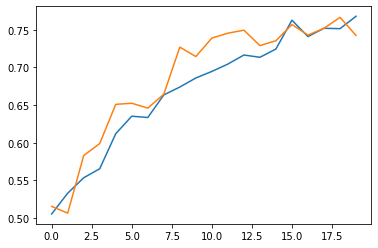

In [60]:
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])

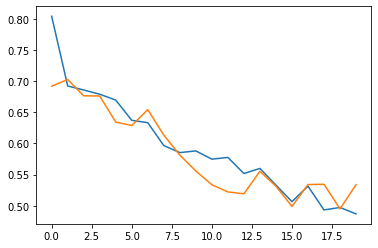

In [61]:
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])

In [62]:
training = model_3.fit_generator(train_generator,
                   steps_per_epoch=nb_train_sample,epochs=40,
                   validation_data=validation_generator,
                       validation_steps=nb_validation_samples)

Epoch 1/40
100/100 [==============================] - 19s 187ms/step - loss: 0.4648 - accuracy: 0.7693 - val_loss: 0.4863 - val_accuracy: 0.7680
Epoch 2/40
100/100 [==============================] - 19s 187ms/step - loss: 0.4720 - accuracy: 0.7743 - val_loss: 0.4726 - val_accuracy: 0.7850
Epoch 3/40
100/100 [==============================] - 19s 186ms/step - loss: 0.4382 - accuracy: 0.7870 - val_loss: 0.5201 - val_accuracy: 0.7830
Epoch 4/40
100/100 [==============================] - 19s 187ms/step - loss: 0.4536 - accuracy: 0.7875 - val_loss: 0.4567 - val_accuracy: 0.7875
Epoch 5/40
100/100 [==============================] - 19s 187ms/step - loss: 0.4373 - accuracy: 0.8045 - val_loss: 0.4590 - val_accuracy: 0.7830
Epoch 6/40
100/100 [==============================] - 19s 187ms/step - loss: 0.4335 - accuracy: 0.8081 - val_loss: 0.4545 - val_accuracy: 0.7900
Epoch 7/40
100/100 [==============================] - 19s 187ms/step - loss: 0.4238 - accuracy: 0.8030 - val_loss: 0.4567 - val_ac

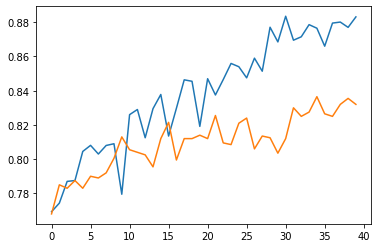

In [63]:
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])

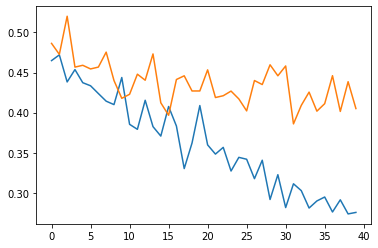

In [64]:
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])